<a href="https://colab.research.google.com/github/choiboy92/ImperialML/blob/main/Tutorial%205/Tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np


def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.transpose())
    return covar


def gen_circular_distribution(n=500, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_simple_circular_distribution(n=100, scale=1):
    a = np.round(n/3).astype('int')
    b = n-a
    r1 = np.random.normal(loc=0, scale=scale, size=[a, 1])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_xor_distribution(n=100):
    a = np.round(n / 4).astype('int')
    b = n-a*3
    xc1 = np.concatenate([np.random.multivariate_normal([-2.3, -2.3], get_cov(0.4, 0.1, -45), a),
                          np.random.multivariate_normal([2.3, 2.3], get_cov(0.4, 0.1, -45), a)])
    xc2 = np.concatenate([np.random.multivariate_normal([-2.3, 2.3], get_cov(0.4, 0.1, 45), a),
                          np.random.multivariate_normal([2.3, -2.3], get_cov(0.4, 0.1, 45), b)])
    xc = np.array(np.concatenate([xc1, xc2]))

    y = np.array(np.concatenate([np.zeros([2 * a, 1]), np.ones([a+b, 1])])).squeeze()
    X = xc
    return X, y

# function for generating the meshgrid for plots
def gen_sample_grid(npx = 200, npy = 200, limit =4):
  x1line = np.linspace(-limit,limit, npx)
  x2line = np.linspace(-limit,limit, npy)

  x1grid, x2grid = np.meshgrid(x1line, x2line)

  # produce an grid array with all grid values
  xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T

  return xgrid, x1line, x2line

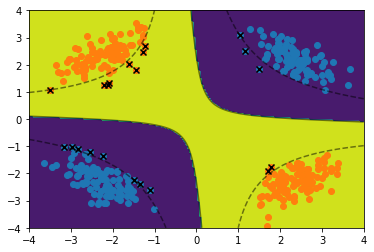

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

from sklearn.svm import SVC

np.random.seed(0)
xor = gen_xor_distribution(n=400)
class0_x0 = xor[0][xor[1]==0, 0]
class0_x1 = xor[0][xor[1]==0, 1]
class1_x0 = xor[0][xor[1]==1, 0]
class1_x1 = xor[0][xor[1]==1, 1]

# define support vector machine
svm = SVC(C=0.01, gamma='auto' , kernel='poly' , degree=2)
svm.fit(xor[0], xor[1])

npx = 200
npy = 200
limit = 4
Xgrid, X1line, X2line = gen_sample_grid(npx, npy, limit)
classVals = svm.predict(Xgrid)
classVals = np.reshape(classVals, [npx,npy])  #reshape
plt.contourf(X1line, X2line, classVals) # plot contour

# plot scatter training data
ax.scatter(class0_x0,class0_x1)
ax.scatter(class1_x0,class1_x1)

# plot margin positions
Z = np.reshape(svm.decision_function(Xgrid), [npx, npy])
ax.contour(X1line , X2line , Z, colors='k', levels=[-1, 0, 1],alpha=0.5, linestyles=['--', '-', '--'])

sv = svm.support_vectors_
ax.scatter(sv[:,0], sv[:,1], marker="x", c="#000000")
plt.show()



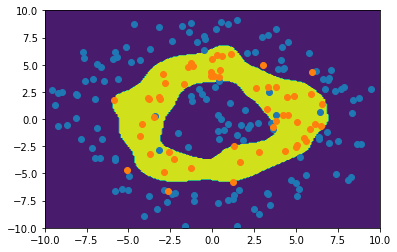

In [72]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

from sklearn.svm import SVC
np.random.seed(0)

X,y = gen_circular_distribution(n=200, scale = 1)

# define support vector machine
svm = SVC(C=1, gamma='auto' , kernel='rbf')
svm.fit(X, y)

npx = 200
npy = 200
limit = 10
Xgrid, X1line, X2line = gen_sample_grid(npx, npy, limit)
classVals = svm.predict(Xgrid)
classVals = np.reshape(classVals, [npx,npy])  #reshape
plt.contourf(X1line, X2line, classVals) # plot contour

# plot feature points
ax.scatter(x[y==0, 0],x[y==0,1])
ax.scatter(x[y==1, 0],x[y==1,1])
plt.show()

In [79]:
# Performance evaluation
from sklearn.svm import SVC
np.random.seed(0)
from sklearn.model_selection import KFold
kf = KFold( n_splits=5, shuffle=True)

# generate circular distribution
X,y = gen_circular_distribution(n=500, scale = 1)

# Different C values
#C = 0.03
#C = 0.2
#C = 2
C = 20

# define support vector machine
svm = SVC(C, gamma='auto' , kernel='rbf')

performance = []
for train_index , test_index in kf.split(X):
  X_train = X[train_index]
  y_train = y[train_index]
  X_test = X[test_index]
  y_test = y[test_index]
  
  #use X_train, y_train to train the SVM
  svm.fit(X_train, y_train)
  #use svm. predict () to predict the output for the test data set 
  y_test_model = svm.predict(X_test)
  
  #loop through to compare the test data output to what it should be
  # and obtain the fraction of correct classifications)
  nTot = len(y_test) 
  nMatch = 0 
  for i in range(len(y_test)):
    if y_test[i] == y_test_model[i]:
      nMatch += 1

  print("With Test data -- Accuracy: ", 100 * nMatch / nTot, "%")
  scores = []
  scores += [100 * nMatch / nTot]
  #do the same prediction and performance assessment performance
  # with the training data
  y_train_model = svm.predict(X_train)
  nTot = len(y_train) 
  nMatch = 0 
  for i in range(len(y_train)):
    if y_train[i] == y_train_model[i]:
      nMatch += 1
  #print("With Training data -- Accuracy: ", 100 * nMatch / nTot, "%")
  scores += [100 * nMatch / nTot]
  performance += [scores]

performance = np.array(performance)
print("Average test performance:", np.average(performance[:,0]))
print("Average training data performance:", np.average(performance[:,1]))

With Test data -- Accuracy:  86.0 %
With Test data -- Accuracy:  92.0 %
With Test data -- Accuracy:  84.0 %
With Test data -- Accuracy:  88.0 %
With Test data -- Accuracy:  91.0 %
Average test performance: 88.2
Average training data performance: 97.65
